# Data visualization and preprocessing

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [145]:
df = pd.read_csv("car_sales.csv") 
num_rows, num_columns = df.shape 
print("Number of rows:", num_rows) 
print("Number of columns:", num_columns)

Number of rows: 157
Number of columns: 15


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  121 non-null    object 
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   155 non-null    object 
 6   Engine size          156 non-null    object 
 7   Horsepower           156 non-null    object 
 8   Wheelbase            156 non-null    object 
 9   Width                156 non-null    object 
 10  Length               156 non-null    object 
 11  Curb weight          155 non-null    object 
 12  Fuel capacity        156 non-null    object 
 13  Fuel efficiency      154 non-null    object 
 14  Latest Launch        157 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

In [104]:
df["Horsepower"]

0      140
1      225
2      225
3      210
4      150
      ... 
152    160
153    168
154    168
155    236
156    201
Name: Horsepower, Length: 157, dtype: object

## dropping  the duplicates

In [146]:
df.replace(".", np.nan, inplace=True)
df_cleaned = df.drop_duplicates() 
print("Number of rows before removing duplicates:", df.shape[0]) 
print("Number of rows after removing duplicates:", 
df_cleaned.shape[0]) 

Number of rows before removing duplicates: 157
Number of rows after removing duplicates: 157


# Print Summary Statistics for Numrical Variables 

In [77]:
print("Summary Statistics for Numerical Variables:") 
print(df.describe())

Summary Statistics for Numerical Variables:
       Sales in thousands
count          157.000000
mean            52.998076
std             68.029422
min              0.110000
25%             14.114000
50%             29.450000
75%             67.956000
max            540.561000


# Missing Values in Each Column 
### df.isnull().sum() counts missing values in each column. 

In [89]:
print("Number of missing values in each column: \n") 
print(df.isnull().sum())

Number of missing values in each column: 

Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Vehicle type           0
Price in thousands     0
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
Latest Launch          0
dtype: int64


In [118]:

def getMinMax(df, column_name): 
    minval = df[column_name].min() 
    maxval = df[column_name].max() 
     
    minrow = df[df[column_name] == minval] 
    maxrow = df[df[column_name] == maxval] 
 
    return minval, maxval, minrow, maxrow 
 
min, max, minrow, maxrow = getMinMax(df, 
"Horsepower") 

print("Hp min: ",min)
print("Hp max: ",max)
print("Min row in HP column: ")
print(df.iloc[33])
minrow

Hp min:  .
Hp max:  92
Min row in HP column: 
Manufacturer               Chrysler     
Model                  Town & Country   
Sales in thousands                 53.48
4-year resale value                19.54
Vehicle type                         Car
Price in thousands                     .
Engine size                            .
Horsepower                             .
Wheelbase                              .
Width                                  .
Length                                 .
Curb weight                            .
Fuel capacity                          .
Fuel efficiency                        .
Latest Launch                  13-Jul-15
Name: 33, dtype: object


,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
33,Chrysler,Town & Country,53.48,19.54,Car,.,.,.,.,.,.,.,.,.,13-Jul-15


In [117]:
print("Max row in HP column:")
maxrow

Max row in HP column:


,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
62,Hyundai,Accent,41.184,5.86,Passenger,9.699,1.5,92,96.1,65.7,166.7,2.24,11.9,31,9-Oct-14


## Probability density distribution of continuous numerical variable-length

In [134]:
from scipy.stats import gaussian_kde

df.columns = df.columns.str.strip()

if "Length" in df.columns:
  df["Length"] = pd.to_numeric(df["Length"],errors="coerce")
  data = df["Length"].dropna()
  kde = gaussian_kde(data)
  density = kde.evaluate(data)
  result = pd.DataFrame({"Length":data,"Denity":density})
  print(result.head())
else:
  print("No Length column")

   Length    Denity
0   172.4  0.016206
1   192.9  0.027570
2   192.0  0.028122
3   196.6  0.023728
4   178.0  0.023772


Text(0.5, 1.0, 'Probability density of length and density')

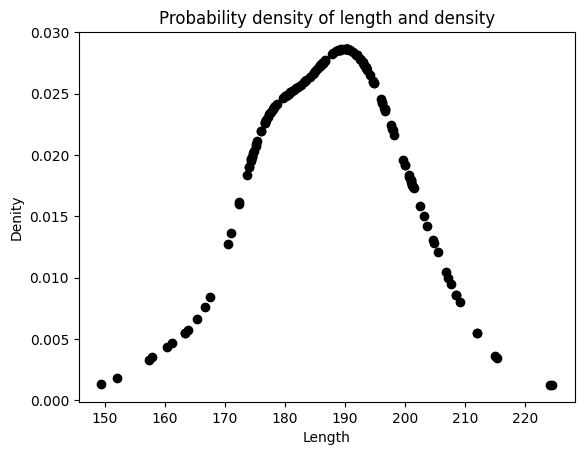

In [139]:
plt.scatter(result["Length"], result["Denity"],color="black")
plt.xlabel("Length")
plt.ylabel("Denity")
plt.title("Probability density of length and density")

#### To count the number of cars by manufacturer (or any other 
categorical column) in your dataset, you can use the groupby() 
function in pandas along with size() or count(). Here's how you can 
do it: 

In [ ]:
df.groupby("Manufacturer").size().reset_index(name="Count")

## Boxplot of other numerical variables w.r.t manufacture

['Sales in thousands']


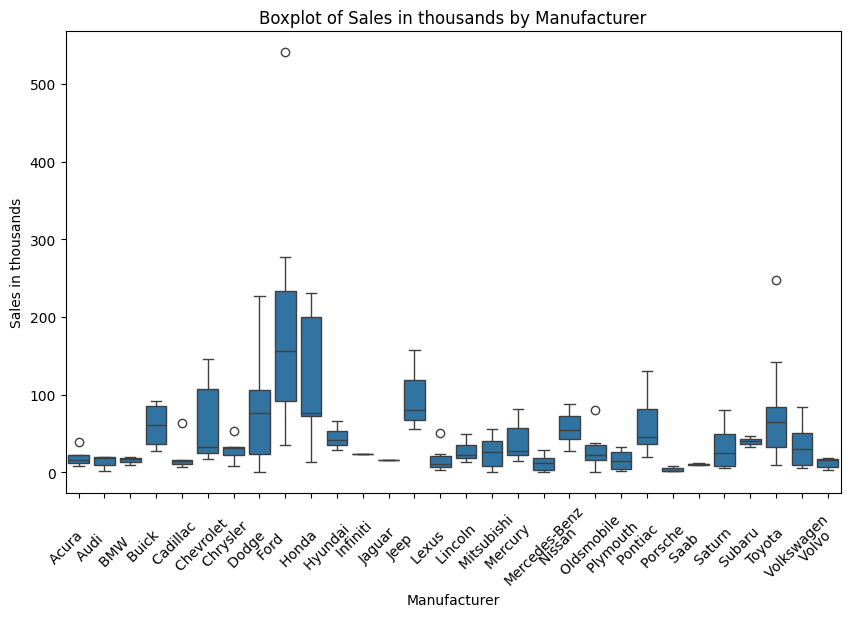

In [157]:
# spaces are trimmed off from the column names
df.columns = df.columns.str.strip()

# selecting the columns only with the integer datatypes
numericalColumns = df.select_dtypes(include=["number"]).columns
numericalColumns = [col for col in numericalColumns if col != "Manufacturer"]
print(numericalColumns)

if("Manufacturer" in df.columns):
  # for col in numericalColumns:
  plt.figure(figsize=(10,6))
  sns.boxplot(x="Manufacturer", y=numericalColumns[0],data=df)
  plt.title(f"Boxplot of {numericalColumns[0]} by Manufacturer")
  plt.xlabel("Manufacturer")
  plt.ylabel(numericalColumns[0])
  plt.xticks(rotation=45)
  plt.show()